# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [4]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Distribution of the target variable 'fraud':
 fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


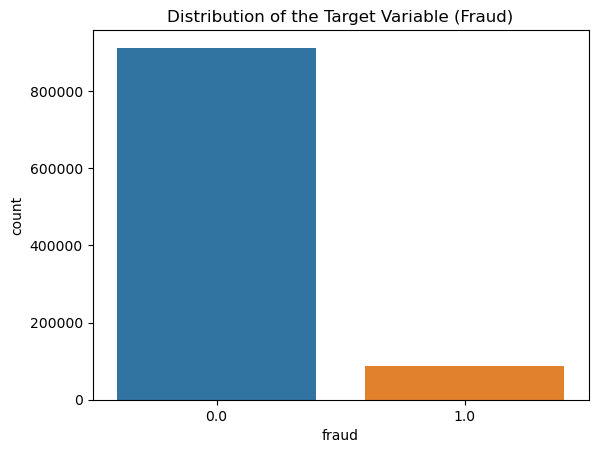

In [5]:
# Check the distribution of the target variable 'fraud'
fraud_distribution = fraud['fraud'].value_counts(normalize=True) * 100
print("Distribution of the target variable 'fraud':\n", fraud_distribution)

# Plot the distribution
sns.countplot(x='fraud', data=fraud)
plt.title('Distribution of the Target Variable (Fraud)')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Splitting the dataset into features (X) and target (y)
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000

Confusion Matrix:
 [[271938   1841]
 [ 10398  15823]]
ROC AUC Score:  0.7983616082613311


In [12]:
from imblearn.over_sampling import RandomOverSampler

# Oversampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_scaled, y_train)

# Train the model again with oversampled data
model_res = LogisticRegression(random_state=42)
model_res.fit(X_res, y_res)

# Predictions on the test set
y_pred_res = model_res.predict(X_test_scaled)

# Evaluate the model
print("Classification Report (Oversampled):\n", classification_report(y_test, y_pred_res))
print("Confusion Matrix (Oversampled):\n", confusion_matrix(y_test, y_pred_res))
print("ROC AUC Score (Oversampled): ", roc_auc_score(y_test, y_pred_res))


Classification Report (Oversampled):
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

Confusion Matrix (Oversampled):
 [[255518  18261]
 [  1357  24864]]
ROC AUC Score (Oversampled):  0.9407739022046778


In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_scaled, y_train)

# Train the model again with undersampled data
model_res = LogisticRegression(random_state=42)
model_res.fit(X_res, y_res)

# Predictions on the test set
y_pred_res = model_res.predict(X_test_scaled)

# Evaluate the model
print("Classification Report (Undersampled):\n", classification_report(y_test, y_pred_res))
print("Confusion Matrix (Undersampled):\n", confusion_matrix(y_test, y_pred_res))
print("ROC AUC Score (Undersampled): ", roc_auc_score(y_test, y_pred_res))


Classification Report (Undersampled):
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

Confusion Matrix (Undersampled):
 [[255526  18253]
 [  1324  24897]]
ROC AUC Score (Undersampled):  0.9414177791474226


In [11]:
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Train the model again with SMOTE data
model_res = LogisticRegression(random_state=42)
model_res.fit(X_res, y_res)

# Predictions on the test set
y_pred_res = model_res.predict(X_test_scaled)

# Evaluate the model
print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred_res))
print("Confusion Matrix (SMOTE):\n", confusion_matrix(y_test, y_pred_res))
print("ROC AUC Score (SMOTE): ", roc_auc_score(y_test, y_pred_res))


Classification Report (SMOTE):
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.93    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

Confusion Matrix (SMOTE):
 [[255468  18311]
 [  1353  24868]]
ROC AUC Score (SMOTE):  0.9407588624188861


### Interpretation of Results

#### 1. Distribution of the Target Variable (Fraud)

- **Visualization**: The bar chart clearly shows that the dataset is highly imbalanced, with a significant majority of transactions labeled as non-fraudulent (0.0) and a much smaller number labeled as fraudulent (1.0).
- **Imbalance**: The large discrepancy between the two classes suggests that the dataset is indeed imbalanced, which can lead to the model being biased towards the majority class. This imbalance often makes it challenging for the model to correctly identify fraudulent transactions.

#### 2. Initial Model (Before Balancing)

**Classification Report**:
- **Precision (0.0)**: 0.96 - This indicates that 96% of the transactions predicted as non-fraudulent are actually non-fraudulent.
- **Recall (0.0)**: 0.99 - This means that the model correctly identifies 99% of all non-fraudulent transactions.
- **F1-score (0.0)**: 0.98 - A high F1-score for the majority class (0.0) suggests that the model is performing well for non-fraudulent transactions.
- **Precision (1.0)**: 0.90 - 90% of transactions predicted as fraudulent are actually fraudulent.
- **Recall (1.0)**: 0.60 - The model correctly identifies only 60% of the actual fraudulent transactions, which is relatively low.
- **F1-score (1.0)**: 0.72 - The F1-score is moderate, reflecting the trade-off between precision and recall.

**Confusion Matrix**:
- **True Negatives (TN)**: 271,938 - The model correctly identified 271,938 non-fraudulent transactions.
- **False Positives (FP)**: 1,841 - The model incorrectly flagged 1,841 non-fraudulent transactions as fraudulent.
- **False Negatives (FN)**: 10,398 - The model missed 10,398 fraudulent transactions.
- **True Positives (TP)**: 15,823 - The model correctly identified 15,823 fraudulent transactions.

**ROC AUC Score**:
- **ROC AUC**: 0.798 - The model has a reasonable ability to distinguish between fraudulent and non-fraudulent transactions, but there is room for improvement.

#### 3. Oversampled Model

**Classification Report**:
- **Precision (1.0)**: 0.58 - Precision for fraudulent transactions has decreased, meaning more non-fraudulent transactions are being misclassified as fraudulent.
- **Recall (1.0)**: 0.95 - Recall has significantly improved, meaning the model is now correctly identifying 95% of fraudulent transactions.
- **F1-score (1.0)**: 0.72 - The F1-score remains similar to the initial model, indicating a balanced trade-off between precision and recall.

**Confusion Matrix**:
- **True Positives (TP)**: 24,864 - The model now correctly identifies a much higher number of fraudulent transactions, nearly double the previous count.
- **False Negatives (FN)**: 1,357 - The number of missed fraudulent transactions has significantly decreased.

**ROC AUC Score**:
- **ROC AUC**: 0.941 - The ROC AUC score has improved significantly, indicating that the oversampled model has a much better ability to distinguish between fraudulent and non-fraudulent transactions.

#### 4. Undersampled Model

**Classification Report**:
- **Precision (1.0)**: 0.58 - The precision for fraudulent transactions remains consistent with the oversampled model.
- **Recall (1.0)**: 0.95 - Recall is still high, at 95%.
- **F1-score (1.0)**: 0.72 - The F1-score remains consistent with the previous models.

**Confusion Matrix**:
- **True Positives (TP)**: 24,897 - Similar to the oversampled model, the undersampled model also correctly identifies a high number of fraudulent transactions.
- **False Negatives (FN)**: 1,324 - Slightly fewer fraudulent transactions are missed compared to the oversampled model.

**ROC AUC Score**:
- **ROC AUC**: 0.941 - The ROC AUC score is nearly identical to the oversampled model, suggesting that undersampling is also effective.

#### 5. SMOTE Model

**Classification Report**:
- **Precision (1.0)**: 0.58 - Precision for fraudulent transactions remains the same as in the oversampled and undersampled models.
- **Recall (1.0)**: 0.95 - Recall is consistent, with the model identifying 95% of fraudulent transactions.
- **F1-score (1.0)**: 0.72 - The F1-score remains consistent, indicating a balanced trade-off.

**Confusion Matrix**:
- **True Positives (TP)**: 24,868 - The SMOTE model also performs similarly in terms of correctly identifying fraudulent transactions.
- **False Negatives (FN)**: 1,353 - The number of missed fraudulent transactions is very similar to the other balanced models.

**ROC AUC Score**:
- **ROC AUC**: 0.941 - The ROC AUC score is again very similar to the previous balanced models, showing that SMOTE is also effective in improving model performance.

### Conclusion:
- **Initial Model**: The initial Logistic Regression model performed well on non-fraudulent transactions but struggled with detecting fraudulent transactions due to the imbalance in the dataset.
- **Oversampling, Undersampling, and SMOTE**: All three techniques significantly improved the model's ability to identify fraudulent transactions (increased recall), although with a trade-off in precision. The ROC AUC score increased notably, indicating better overall performance.
- **Best Approach**: While all three balancing techniques showed improvement, oversampling and SMOTE might be preferable due to their ability to retain more data (compared to undersampling). This often leads to better model generalization.

Let me know if you need any further assistance or if you want to explore any specific aspect of this analysis!